In [1]:
#Carregando os pacotes utilizados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#carregando os dados
enade =  open("enade.csv","r")
enade = pd.read_table(enade,delimiter=",",decimal =".")

In [6]:
#Visualizando as 5 primeiras linhas do banco de dados
enade.head()

,CO_UF_CURSO,NU_IDADE,TP_PRES,CO_MODALIDADE,NT_GER,QE_I17,QE_I21
0,51,27,555,1,51.9,B,A
1,51,26,555,1,54.2,B,A
2,51,23,222,1,NaN,A,A
3,51,24,555,1,42.1,B,A
4,51,41,222,1,NaN,,


In [80]:
######### DESCRIÇÃO DAS VARIÁVEIS ###############
#CO_UF_CURSO - Código da UF de funcionamento do curso
#NU_IDADE - Idade do inscrito em 24/11/2019
#TP_PRES - Tipo de presença no Enade
#CO_MODADELIDADE - Código da Modalidade de Ensino
#NT_GER - Nota bruta da prova - Média ponderada da formação geral (25%) e componente específico (75%). (valor de 0 a 100)
#QE_I17 - Em que tipo de escola você cursou o ensino médio?
#QE_I21 -Alguém em sua família concluiu um curso superior?

In [7]:
# Filtrando os candidatos presentes com resultado válido
enade = enade.loc[enade['TP_PRES']==555]


In [8]:
# Retirando as linhas que o resultado da Nota bruta da prova era inexistente
enade.dropna(subset=['NT_GER'],inplace=True)

In [9]:
# Selecionando os candidatos que fizeram o ensino médio apenas no Brasil
enade=enade.loc[(enade['QE_I17']=='A') | (enade['QE_I17']=='B')| (enade['QE_I17']=='D')| (enade['QE_I17']=='E')]

In [10]:
#Criando dicionário para descrever os estados 
UF_dicionario = {11:'RO',
12:'AC',
13:'AM',
14:'RR',
15:'PA',
16:'AP',
17:'TO',
21:'MA',
22 :'PI',
23:'CE',
24:'RN',
25:'PB',
26:'PE',
27:'AL',
28:'SE',
29:'BA',
31:'MG',
32:'ES',
33:'RJ',
35:'SP',
41:'PR',
42:'SC',
43:'RS',
50:'MS',
51:'MT',
52:'GO',
53:'DF'}



In [11]:
#Criando uma coluna para UF
enade['UF']=enade.CO_UF_CURSO.map(UF_dicionario)
enade.head(2)

,CO_UF_CURSO,NU_IDADE,TP_PRES,CO_MODALIDADE,NT_GER,QE_I17,QE_I21,UF
0,51,27,555,1,51.9,B,A,MT
1,51,26,555,1,54.2,B,A,MT


In [86]:
#Quantos alunos por estados fizeram o Enade 2019?
enade.UF.value_counts()

SP    92555
MG    48714
RJ    32377
PR    27992
RS    21486
SC    19979
BA    18179
PE    13745
CE    13611
GO    11577
PB     9268
DF     9082
PA     8376
MA     7203
AM     7112
RN     5864
PI     5803
ES     5646
MT     5506
SE     4486
MS     4406
AL     4364
TO     3647
RO     2883
AP     1546
AC     1487
RR      745
Name: UF, dtype: int64

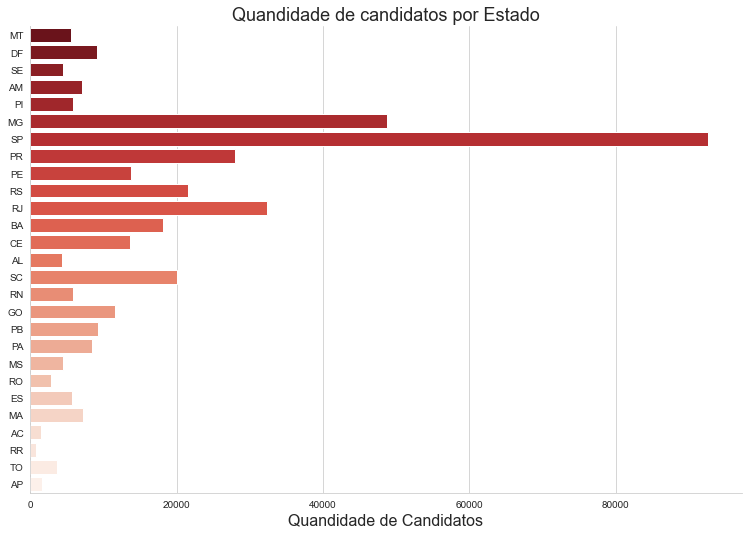

In [12]:
#Gráfico de barra quantidade de candidatos por Estado
sns.set_style("whitegrid")
g = sns.catplot(y='UF',data=enade,kind="count",palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("Quandidade de candidatos por Estado",fontdict={'size':18})
g.ax.xaxis.set_label_text("Quandidade de Candidatos",fontdict= {'size':16})
g.ax.yaxis.set_label_text("",fontdict= {'size':16})
plt.show()

In [13]:
mais_velho, mais_novo = [enade.NU_IDADE.max(),enade.NU_IDADE.min()]

In [14]:
# O candidato mais novo
mais_novo

11

In [15]:
#O candidato mais velho
mais_velho

86

In [16]:
#idade média dos candidatos
round(enade.NU_IDADE.mean(),2) 

27.38

In [17]:
#Idade mais frequente
enade.NU_IDADE.value_counts()
#23 anos é idade mais frequente doS candidatos que fizeram a prova do Enade

23    61676
24    53128
25    42146
22    41410
26    30704
      ...  
75        1
78        1
81        1
18        1
86        1
Name: NU_IDADE, Length: 64, dtype: int64

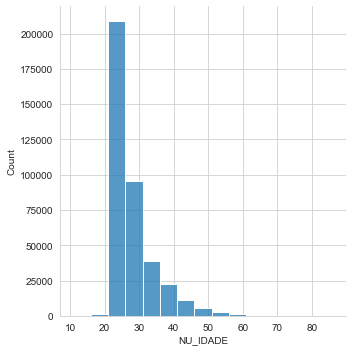

In [18]:
#Histograma da distribuição de idade
sns.displot(enade, x= 'NU_IDADE',stat='count',binwidth=5)
plt.show()

In [20]:
maior_nota, menor_nota,media_nota,mediana_nota = [enade.NT_GER.max(),enade.NT_GER.min(),round(enade.NT_GER.mean(),2),enade.NT_GER.median() ]

In [21]:
# Menor nota
menor_nota

0.0

In [22]:
# Maior nota
maior_nota

93.0

In [23]:
# Mediana das notas
mediana_nota

# Metade dos alunos tiraram notas até 43.8

43.8

In [24]:
# média das notas
media_nota

44.11

c:\users\flávio\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

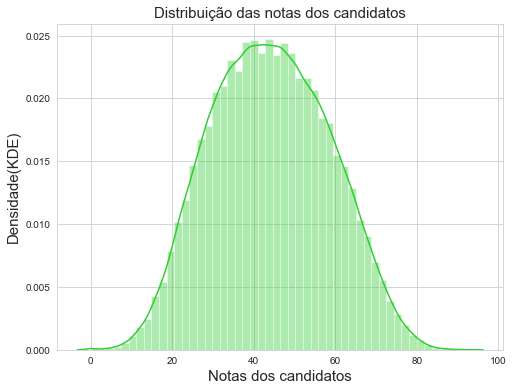

In [25]:
# Distribuição das notas dos candidatos
fig,ax=plt.subplots(figsize=(8,6))
sns.distplot(enade['NT_GER'],color ="#33cc33",ax=ax)
ax.set_title('Distribuição das notas dos candidatos',fontsize=15)
plt.xlabel('Notas dos candidatos',fontsize=15)
plt.ylabel('Densidade(KDE)',fontsize=15)
plt.show

In [26]:
# Colocando a contagem de cada elemento de uma coluna em uma lista
labels = ['EaD','Presencial']
contagem = enade.CO_MODALIDADE.value_counts()[0],enade.CO_MODALIDADE.value_counts()[1]
contagem

(18049, 369590)

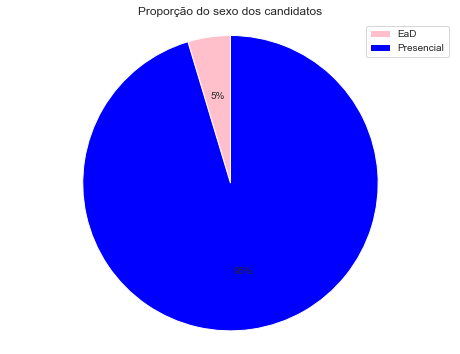

In [27]:
#Gráfico de setores da modalidade de ensino dos candidatos
fig,ax1=plt.subplots(figsize=(8,6))
cores = ['pink','blue']
ax1.pie(contagem,autopct = '%1.0f%%',colors = cores,startangle=90)
ax1.axis('equal') #centraliza o gráfico
plt.title("Proporção do sexo dos candidatos")
plt.legend(labels, loc='upper right')
plt.show()

In [28]:
#Criando uma coluna para modalidade
DIC_MODALIDADE = {0:'EaD', 1:'Presencial'}
enade['MODALIDADE']=enade.CO_MODALIDADE.map(DIC_MODALIDADE)



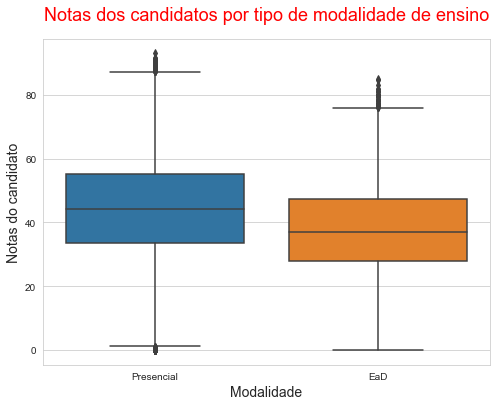

In [29]:
# Comparação do desempenho dos alunos da modalidade:EaD e Presencial
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=enade['MODALIDADE'],y=enade['NT_GER'])
ax.text(0.5,105,"Notas dos candidatos por tipo de modalidade de ensino",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Modalidade",fontdict= {'size':14})
ax.yaxis.set_label_text("Notas do candidato",fontdict= {'size':14})
plt.show()
# O boxplot é um gráfico que avalia a distribuição. Nele podemos verificar 
# o primeiro, o terceiro quartil e a mediana, além dos outlier. 

# Sendo assim, observamos que a mediana dos alunos da modalidade presencial
# é maior que a dos alunos EaD. 

#Observa-se que os alunos do ensino presencial tiveram um desempenho melhor

In [30]:
#Criando uma coluna para tipo de escola que cursou o ensino médio
dic_ensino = { 'A': "Pública", 'B': 'Particular', 'D':"Pública e Particular", 'E': "Pública e Particular"}
enade['ensino'] = enade.QE_I17.map(dic_ensino)

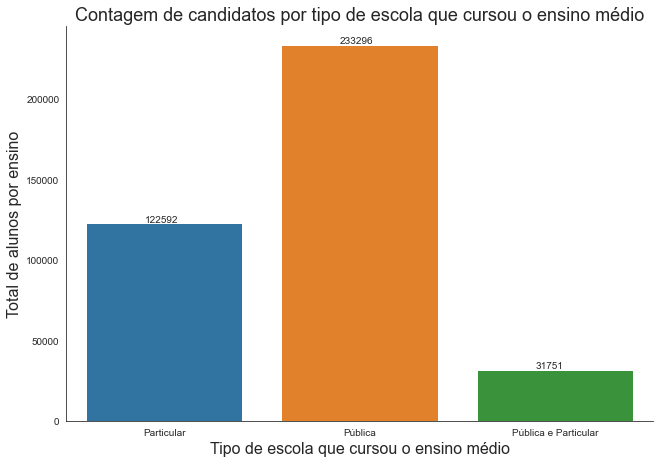

In [31]:
# Contagem dos candidatos por tipo de escola que cursou o ensino médio
sns.set_style("white")
g=sns.catplot(x='ensino',data=enade,kind='count',height = 6, aspect=1.5)
g.ax.xaxis.set_label_text("Tipo de escola que cursou o ensino médio",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de alunos por ensino", fontdict= {'size':16})
g.ax.set_title("Contagem de candidatos por tipo de escola que cursou o ensino médio",fontdict= {'size':18})

for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1000))

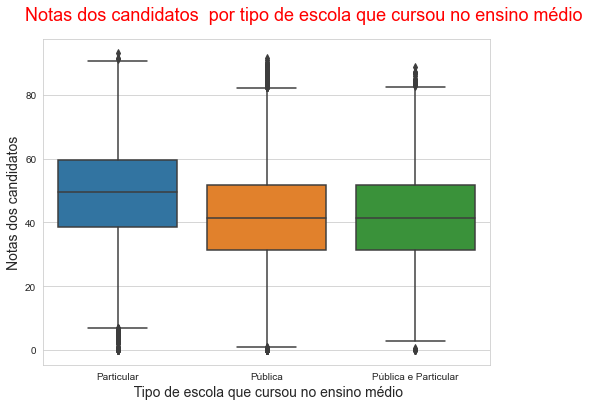

In [32]:
# Comparação do desempenho por tipo de escola que cursou o ensino médio em escola : Pública, particular ou pública e particular
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=enade['ensino'],y=enade['NT_GER'])
ax.text(1.25,105,"Notas dos candidatos  por tipo de escola que cursou no ensino médio",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text(" Tipo de escola que cursou no ensino médio",fontdict= {'size':14})
ax.yaxis.set_label_text("Notas dos candidatos",fontdict= {'size':14})
plt.show()

#Observa-se que os candidatos que cursaram o ensino médio em escolas particulares tiveram um desempenho melhor

In [33]:
# De qual estado é o candidato mais velho e qual foi a modalidade de ensino?
enade.loc[enade['NU_IDADE']==86][['UF','MODALIDADE']]

,UF,MODALIDADE
123154,MT,Presencial


In [34]:
# Qual a modalidade de ensino e o tipo de escola que cursou no ensino médio o candidato com a  maior nota?
enade.loc[enade['NT_GER']==93][['MODALIDADE','ensino']]

,MODALIDADE,ensino
346836,Presencial,Particular
